# Clase 10

In [1]:
import numpy as np

In [2]:
arr= np.arange(12) 
arr2= arr.reshape((3,4))    

print(np.trapz(arr2,axis=0))
print(np.trapz(arr2,axis=1))


[ 8. 10. 12. 14.]
[ 4.5 16.5 28.5]


qué espaciamiento usa?
If x is None, the sample points are assumed to be evenly spaced dx apart. The default is None.
dx = 1 por default


Puedo usar enumerate en mi código para trabajar más rápido
Probar usar la función vectorize para vectorizar la función derivada y ver si así el código corre más rápido

¿vectorize puede tomar una función que reciba y entregue vectores?

In [ ]:

def derivada(t,y):
    # y es un array
    return np.array([y[0] + 1, y[1] + 1])

t0 = 0
y = np.ones(2)
derivada(t0, y)

In [ ]:


derivada2 = np.vectorize(derivada, otypes = np.ndarray)
derivada2(t0,y)

Según 
https://stackoverflow.com/questions/35215161/most-efficient-way-to-map-function-over-numpy-array
la forma más rápida de trabajar es usando funciones de numpy por defecto. Usar vectorized podría ayudar, pero no tanto como trabajar directamente con np

-----

## Ejercicios 10 (b)

1. Vamos a estudiar la frecuencia de aparición de cada dígito en la serie de Fibonacci, generada siguiendo las reglas:
$$a_{1} = a_{2} = 1, \quad a_{i} = a_{i-1} + a_{i-2}.$$

  Se pide:

  1. Crear una función que acepta como argumento un número entero $N$ y retorna una secuencia (lista, tupla, diccionario o *array*) con los elementos de la serie de Fibonacci.
  2. Crear una función que devuelva un histograma de ocurrencia de cada uno de los dígitos en el primer lugar del número. Por ejemplo para los primeros 8 valores ($N=8$): $1,1,2,3,5,8,13,21$ tendremos que el $1$ aparece 3 veces, el $2$ aparece $2$ veces, $3, 5, 8$ una vez. Normalizar los datos dividiendo por el número de valores $N$.
  3. Utilizando las dos funciones anteriores graficar el histograma para un número $N$ grande y comparar los resultados con la ley de Benford
  $$P(n) = \log_{10}\left(1+ \frac{1}{d} \right). $$


2. **PARA ENTREGAR:** Estimar el valor de π usando diferentes métodos basados en el método de Monte Carlo:

    1. Crear una función para calcular el valor de $\pi$ usando el "método de cociente de áreas". Para ello:

      * Generar puntos en el plano dentro del cuadrado de lado unidad cuyo lado inferior va de $x=0$ a $x=1$
      * Contar cuantos puntos caen dentro del (cuarto de) círculo unidad. Este número tiende a ser proporcional al área del círculo
      * La estimación de $\pi$ será igual a cuatro veces el cociente de números dentro del círculo dividido por el número total de puntos.

    2. Crear una función para calcular el valor de $\pi$ usando el "método del valor medio":
       Este método se basa en la idea de que el valor medio de una función se puede calcular de la siguiente manera:

    $$ \langle f \rangle = \frac{1}{b-a} \int_{a}^{b} f(x)\, dx $$

    Tomando la función particular $f(x)= \sqrt{1- x^{2}}$ entre $x=0$ y $x=1$, obtenemos:

    $$ \langle f \rangle = \int_{0}^{1} \sqrt{1- x^{2}}\, dx = \frac{\pi}{4} $$

    Entonces, tenemos que estimar el valor medio de la función $f$ y, mediante la relación anterior obtener $\pi = 4 \langle f(x) \rangle$. Para obtener el valor medio de la función notamos que si tomamos $X$ es una variable aleatoria entre 0 y 1, entonces el valor medio de $f(X)$ es justamente $\langle f \rangle$. Su función debe entonces

      * Generar puntos aleatoriamente en el intervalo $[0,1]$
      * Calcular el valor medio de $f(x)$ para los puntos aleatorios $x$.
      * El resultado va a ser igual al valor de la integral, y por lo tanto a $\pi/4$.

    3. Utilizar las funciones anteriores con diferentes valores para el número total de puntos $N$. En particular, hacerlo para 20 valores de $N$  equiespaciados logarítmicamente entre 100 y 10000. Para cada valor de $N$ calcular la estimación de $\pi$. Realizar un gráfico con el valor estimado como función del número $N$ con los dos métodos (dos curvas en un solo gráfico)

    4. Para $N=15000$ repetir el "experimento" muchas veces (al menos 1000) y realizar un histograma de los valores obtenidos para $\pi$ con cada método. Graficar el histograma y calcular la desviación standard. Superponer una función Gaussiana con el mismo ancho. El gráfico debe ser similar al siguiente (*el estilo de graficación no tiene que ser el mismo*)

    ![](figuras/ejercicio_09_1.png)
    
    5. El método de la aguja del bufón se puede utilizar para estimar el valor de $\pi$, y consiste en tirar agujas (o palitos, fósforos, etc) al azar sobre una superficie rayada

    ![](figuras/Streicholz-Pi-wiki.jpg)

    Por simplicidad vamos a considerar que la distancia entre rayas $t$ es mayor que la longitud de las agujas $\ell$

    ![](figuras/Buffon_needle_wiki.png)

    La probabilidad de que una aguja cruce una línea será:

    $$ P = \frac{2 \ell}{t\, \pi} $$

    por lo que podemos calcular el valor de $\pi$ si estimamos la probabilidad $P$. Realizar una función que estime $\pi$ utilizando este método y repetir las comparaciones de los dos puntos anteriores pero ahora utilizando este método y el de las áreas.
    
-----

### Ejercicio 1

In [7]:
import numpy as np

#### Ejercicio 1.1

In [8]:
def fibonacci(N):
    '''
    Calcula los primeros N términos de la sucesión de Fibonacci
    '''
    if N == 2:
        return fibonacci(1) + [1]
    elif N == 1:
        return [1]
    else:
        fibo_1N = fibonacci(N-1) #fibonacci de N-1
        return fibo_1N + [fibo_1N[-1] + fibo_1N[-2]]

#### Ejercicio 1.2

In [85]:
N = 8

def ocurrencia(N):
    #Calculo la serie de Fibonacci
    lista = fibonacci(N)

    #Convierto la lista a ndarray
    lista = np.array(lista)

    #Los elementos que tengan un solo dígito los dejamos para el histograma
    #Los elementos que tengan más de un dígito tienen que ser operados

    #Separamos los dígitos usando condiciones
    mayor = lista[lista >= 10]

    #Calculo el resto de dividir por 10
    mayor = mayor // 10 ** (np.floor(np.log10(mayor)))


    #vuevlo a asignar a la lista
    lista[lista >= 10] = mayor.astype(int)


    #Calculo el histograma usando numpy
    h,b = np.histogram(lista, bins=np.arange(0.5,9.6,1), density = True)

    return h, b

#### Ejercicio 1.3

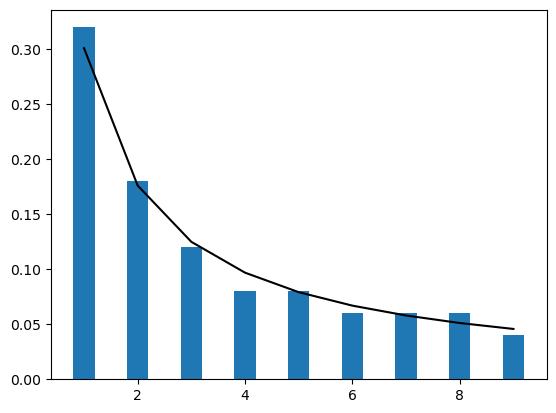

In [92]:
#Grafico
N = 50
h, b = ocurrencia(N)
x = (b[1:] + b[:-1])/2

import matplotlib.pyplot as plt
plt.bar(x,h, align="center", width=0.4)


def Benford(d):
    return np.log10(1 + 1/d)

plt.plot(x, Benford(x), color = "black")

### Ejercicio 2

In [95]:
import numpy as np

In [130]:
#Ejercicio 1



def metodo_cociente_de_areas(N_puntos):
    '''
    Aproxima el valor de pi mediante el método de cociente de áreas
    
    Parameters
    ----------
    N_puntos (int): nro de puntos aleatorios generados

    Returns
    -------
    pi_aprox (float): aproximación de pi

    '''
    #Genero puntos en el plano de forma aleatoria con una distribución uniforme
    puntos = np.random.rand(N_puntos, 2)

    #Calculo la distancia al origen
    distancias = puntos[:,0]**2 + puntos[:,1]**2

    area = 4*np.sum(distancias <= 1)/N_puntos

    pi_aprox = area

    return pi_aprox

N_puntos =  100000
print(metodo_cociente_de_areas(N_puntos))

3.13964


In [131]:
#Ejercicio 2

def f(x):
    return np.sqrt(1-x**2)

def metodo_valor_medio(N):
    '''
    Aproxima el valor de pi mediante el método del valor medio

    Parameters
    ----------
    N (int): nro de valores aleatorios generados
    
    Returns
    -------
    pi_aprox (float): aproximación de pi
    '''

    #Generamos valores aleatoriamente 
    valores = np.random.rand(N)


    pi_aprox = 4*np.mean(f(valores))

    return pi_aprox

N = 1000000
print(metodo_valor_medio(N))

3.140982718155211


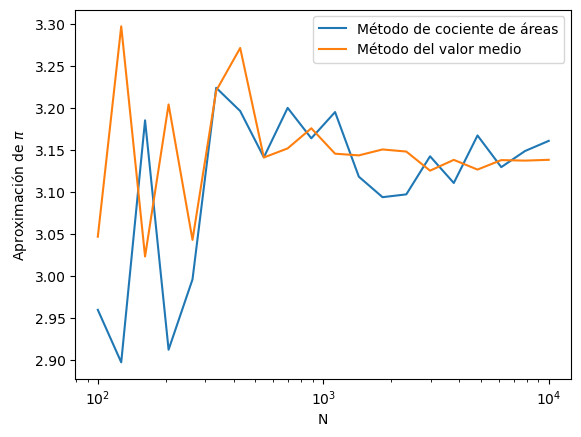

In [136]:
#Ejercicio 3

N_array = np.logspace(2,4,20, dtype = int)


metodo_cociente_de_areas_vec = np.vectorize(metodo_cociente_de_areas)
metodo_valor_medio_vec = np.vectorize(metodo_valor_medio)


pi_metodo1 = metodo_cociente_de_areas_vec(N_array)
pi_metodo2 = metodo_valor_medio_vec(N_array)

import matplotlib.pyplot as plt
plt.plot(N_array, pi_metodo1, label = "Método de cociente de áreas")
plt.plot(N_array, pi_metodo2, label = "Método del valor medio")
plt.legend()
plt.xlabel("N")
plt.ylabel("Aproximación de $\pi$")
plt.xscale("log")

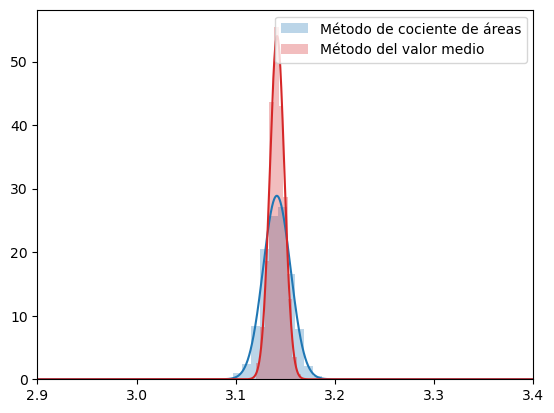

In [169]:
#Ejercicio 4
N_exp = 1000 #Nro de veces que se repite el experimento
N = 15000
N_array = N*np.ones(N_exp, dtype = int)

pi_metodo1 = metodo_cociente_de_areas_vec(N_array)
pi_metodo2 = metodo_valor_medio_vec(N_array)


#Grafico
alpha = 0.3
plt.hist(pi_metodo1, alpha = alpha, label = "Método de cociente de áreas", density = True, color = "tab:blue")
plt.hist(pi_metodo2, alpha = alpha, label = "Método del valor medio", density = True, color = "tab:red")
plt.xlim([2.9,3.4])
plt.legend()

#Calculo la desviación estándar y la media
mean1, std1 = np.mean(pi_metodo1), np.std(pi_metodo1)
mean2, std2 = np.mean(pi_metodo2), np.std(pi_metodo2)

#Grafico una gaussiana para cada método
def f_gauss(x, mu, sigma):
    '''
    Evalúa la función Gaussiana con desviación estándar sigma y media mu
    '''
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

x_array = np.linspace(2.9,3.4, 10000)
plt.plot(x_array, f_gauss(x_array, mean1, std1), color = "tab:blue")
plt.plot(x_array, f_gauss(x_array, mean2, std2), color = "tab:red")



In [188]:
#Ejercicio 5
def metodo_aguja(N):
    t = 2
    l = 1

    #La distancia entre rayas es t

    #Genero un punto random entre [0,1]x[0,t]. Este será el punto inicial de la aguja
    puntos_inicio = np.random.rand(N,2)

    #Genero un ángulo al azar
    angulos = np.random.rand(N)*(2*np.pi) #Es trampa usar pi acá?

    #Calculo el punto final de la aguja
    puntos_final = l*np.array([np.cos(angulos), np.sin(angulos)]).T + puntos_inicio

    #Verificación: el resultado del print debe dar l para cada punto
    # print(np.sqrt((puntos_final[:,0] - puntos_inicio[:,0])**2 + (puntos_final[:,1] - puntos_inicio[:,1])**2))

    #Si la coordenada y es > t o < 0, entonces cruzó una raya
    P = (np.sum(puntos_final[:,1]>t) + np.sum(puntos_final[:,1]<0))/N

    pi_aprox = 2*l/t/P

    return pi_aprox


N = 1000000
print(metodo_aguja(N))

3.13995994667092


In [190]:
#Vectorizo
metodo_aguja_vec = np.vectorize(metodo_aguja)

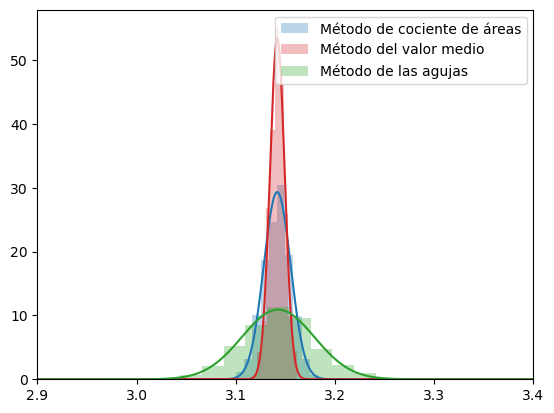

In [192]:
#Ejercicio 4
N_exp = 1000 #Nro de veces que se repite el experimento
N = 15000
N_array = N*np.ones(N_exp, dtype = int)


metodos = [metodo_cociente_de_areas_vec, metodo_valor_medio_vec, metodo_aguja_vec]
colores = ["tab:blue", "tab:red", "tab:green"]
legendas = ["Método de cociente de áreas", "Método del valor medio","Método de las agujas"]

#Parámetros de graficación
alpha = 0.3 #opacidad del gistograma

for (i,metodo) in enumerate(metodos):
    #Calculo pi con cada método
    pi_aprox = metodo(N_array)
    #Histograma
    plt.hist(pi_aprox, alpha = alpha, label = legendas[i], density = True, color = colores[i])
    #Calculo la desviación estándar y la media
    mean, std = np.mean(pi_aprox), np.std(pi_aprox)
    #Grafico gaussiana
    x_array = np.linspace(2.9,3.4, 10000)
    plt.plot(x_array, f_gauss(x_array, mean, std), color = colores[i])


plt.xlim([2.9,3.4])
plt.legend()

